In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import pandas as pd
#import seaborn as sns

In [50]:
df1 = pd.read_json('japanese.json')
df2 = pd.read_json('mexican.json')
df3 = pd.read_json('american.json')
dflist = [df1, df2, df3]
df = df1
df.head(5)

,housing,housing_median,income,population,restaurant_avg_rating,restaurant_number,zipcode
0,1517200,1015200,NaN,0,3.571429,7,10004
1,1210900,983000,101172.199170,1140,3.500000,4,10005
10,NaN,1650000,59860.632802,26332,0.000000,0,10069
11,NaN,47445200,67168.536094,12346,0.000000,0,10044
12,1104600,500000,54919.111217,63499,4.071429,7,10009


In [51]:
#how many areas have housing values NE 0 or nan? 
print "Number of Zipcodes with Housing Price: ",len(df[(df.housing_median > 0) | (df.housing > 0)])

Number of Zipcodes with Housing Price:  44


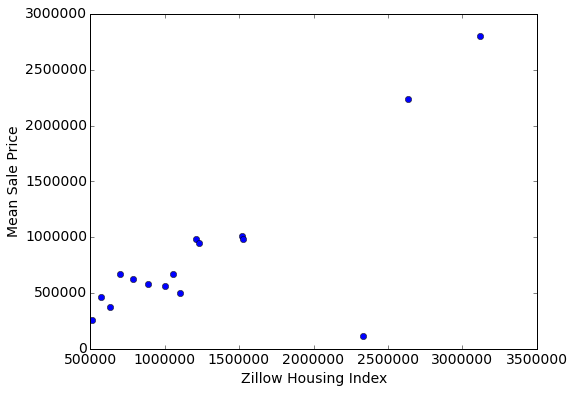

In [56]:
mpl.rcParams["figure.figsize"] = (8,6)
mpl.rcParams["font.size"] = 14

plt.plot(df.housing,df.housing_median,marker='o',ls="None")

plt.xlabel("Zillow Housing Index")
plt.ylabel("Mean Sale Price")

In [57]:
print df.columns

Index([u'housing', u'housing_median', u'income', u'population', u'restaurant_avg_rating', u'restaurant_number', u'zipcode'], dtype='object')


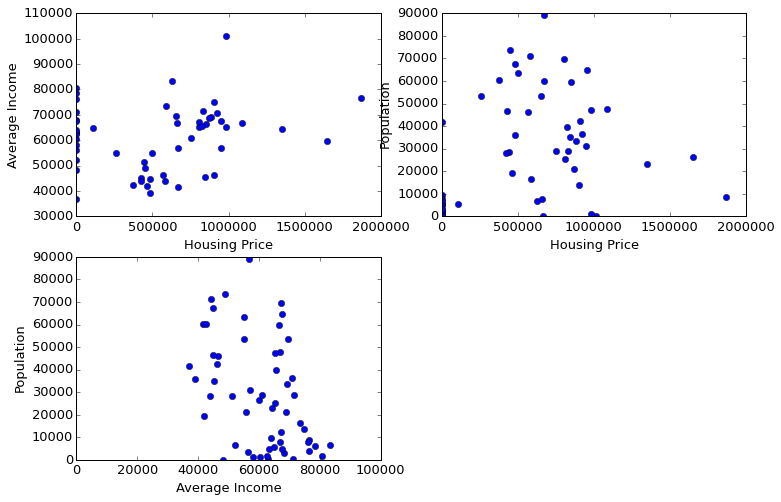

In [58]:
mpl.rcParams["figure.figsize"] = (12,8)
mpl.rcParams["font.size"] = 13
ax1 = plt.subplot(221)
ax1.plot(df.housing_median,df.income,marker='o',ms=6,ls='None')
ax1.set_xlim([0,2e6])
ax1.set_xlabel("Housing Price")
ax1.set_ylabel("Average Income")
ax2 = plt.subplot(222)
ax2.plot(df.housing_median,df.population,marker='o',ms=6,ls='None')
ax2.set_xlim([0,2e6])
ax2.set_xlabel("Housing Price")
ax2.set_ylabel("Population")
ax2 = plt.subplot(223)
ax2.plot(df.income,df.population,marker='o',ms=6,ls='None')
ax2.set_xlim([0,100000])
ax2.set_xlim([0,100000])
ax2.set_xlabel("Average Income")
ax2.set_ylabel("Population")

## Restaurant Number / Rating versus Median Housing Price

In [169]:
from sklearn.metrics import explained_variance_score
from sklearn import linear_model
import matplotlib.gridspec as gridspec

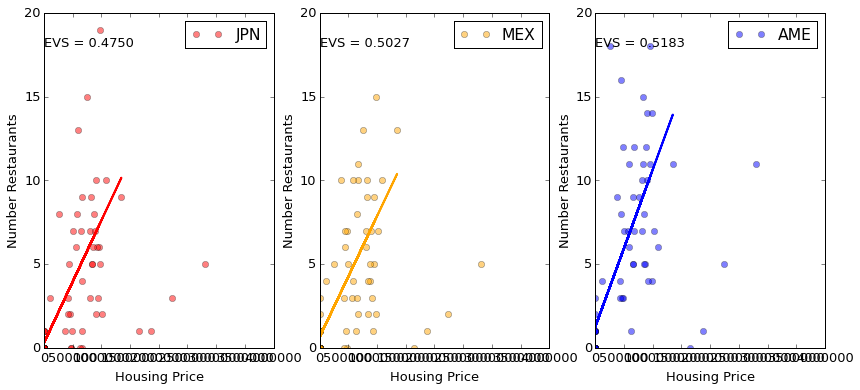

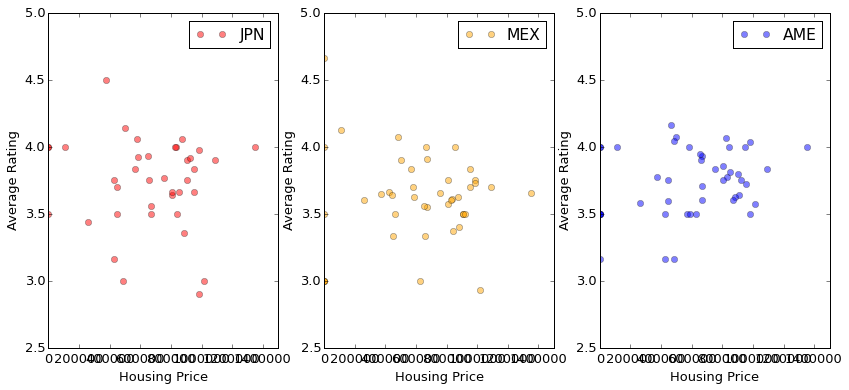

In [186]:
mpl.rcParams["figure.figsize"] = (14,6)
mpl.rcParams["font.size"] = 13

labels = ['JPN','MEX','AME']
gs = gridspec.GridSpec(1, 3)
fig1 = plt.figure()
colors = ['red','orange','blue']
for i, data in enumerate(dflist):
    
    clf = linear_model.LinearRegression()
    X = np.array(data.housing_median.astype('float'))
    mask = (np.isfinite(X)) & (X < 1.5e6)
    X = X[mask,np.newaxis]
    y = np.array(data.restaurant_number.astype('float'))
    y = y[mask,np.newaxis]
    clf.fit(X,y)

    EVS = explained_variance_score(y, clf.predict(X))
    
    ax = fig1.add_subplot(gs[i])
    ax.plot(data.housing_median,data.restaurant_number,marker='o',ms=6,ls='None',label=labels[i],color=colors[i],alpha=0.5)
    ax.plot(X,clf.predict(X),color=colors[i],lw=2)
    ax.set_xlim([0,4e6])
    ax.set_ylim([0,20])
    ax.set_xlabel("Housing Price")
    ax.set_ylabel("Number Restaurants")
    ax.legend(loc=1)
    ax.text(0,18,"EVS = {0:<4.4f}".format(EVS))
                                    

fig2 = plt.figure()
for i, data in enumerate(dflist):
    ax = fig2.add_subplot(gs[i])
    ax.plot(data.housing_median,data.restaurant_avg_rating,marker='o',ms=6,ls='None',label=labels[i],color=colors[i],alpha=0.5)
    ax.set_xlim([0,1.5e6])
    ax.set_ylim([2.5,5])
    ax.set_xlabel("Housing Price")
    ax.set_ylabel("Average Rating")
    ax.legend(loc=1)

## Restaurant Number / Rating versus Average Income

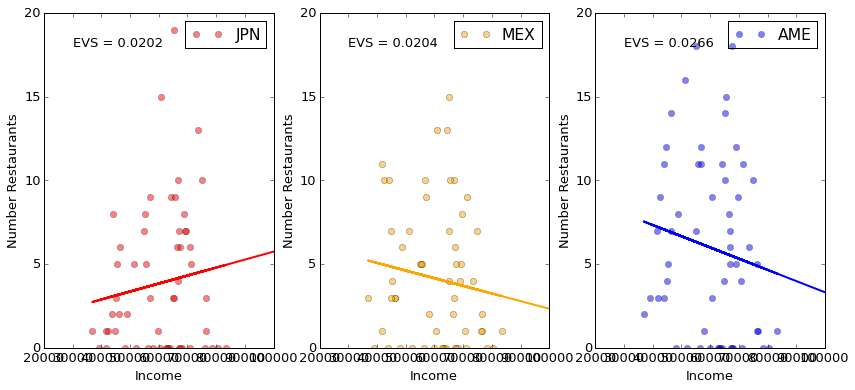

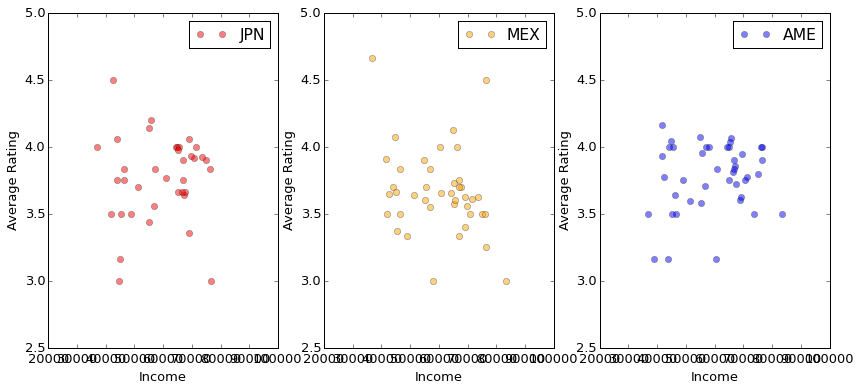

In [187]:
mpl.rcParams["figure.figsize"] = (12,12)
mpl.rcParams["font.size"] = 13

labels = ['JPN','MEX','AME']

mpl.rcParams["figure.figsize"] = (14,6)
gs = gridspec.GridSpec(1, 3)
fig1 = plt.figure()
colors = ['red','orange','blue']
for i, data in enumerate(dflist):
    
    clf = linear_model.LinearRegression()
    X = np.array(data.income.astype('float'))
    mask = np.isfinite(X)
    X = X[mask,np.newaxis]
    y = np.array(data.restaurant_number.astype('float'))
    y = y[mask,np.newaxis]
    clf.fit(X,y)

    EVS = explained_variance_score(y, clf.predict(X))

    ax = fig1.add_subplot(gs[i])
    ax.plot(data.income,data.restaurant_number,marker='o',ms=6,ls='None',label=labels[i],color=colors[i],alpha=0.5)
    ax.plot(X,clf.predict(X),color=colors[i],lw=2)
    ax.set_xlim([20000,1e5])
    ax.set_ylim([0,20])
    ax.set_xlabel("Income")
    ax.set_ylabel("Number Restaurants")
    ax.legend(loc=1)
    ax.text(30000,18,"EVS = {0:<4.4f}".format(EVS))


fig2 = plt.figure()
for i, data in enumerate(dflist):
    ax = fig2.add_subplot(gs[i])
    ax.plot(data.income,data.restaurant_avg_rating,marker='o',ms=6,ls='None',label=labels[i],color=colors[i],alpha=0.5)
    ax.set_xlim([20000,1e5])
    ax.set_ylim([2.5,5])
    ax.set_xlabel("Income")
    ax.set_ylabel("Average Rating")
    ax.legend(loc=1)

## Restaurant Number / Rating versus Total Population

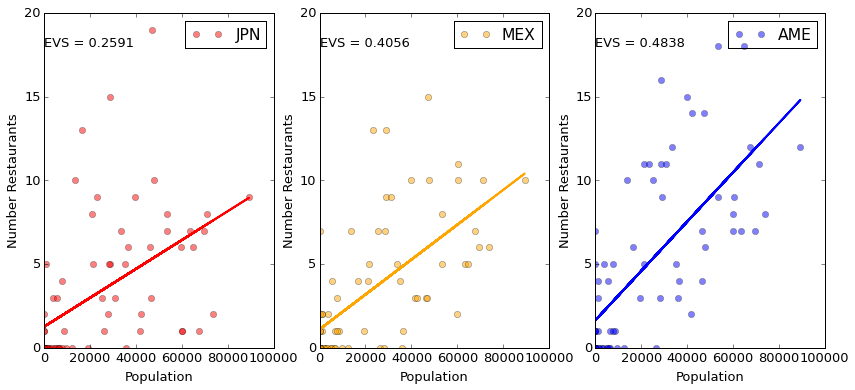

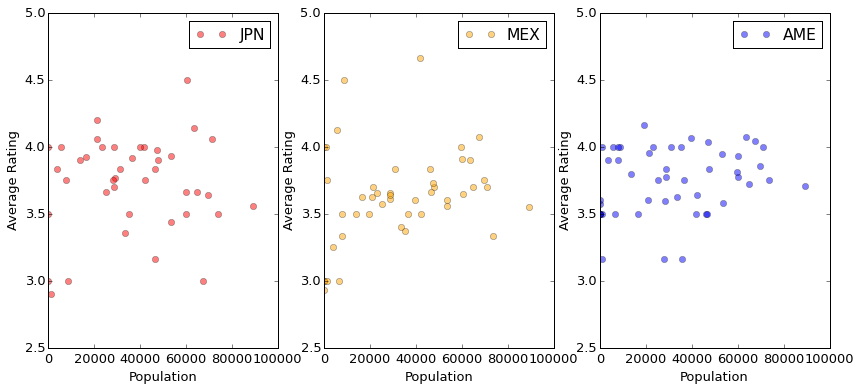

In [189]:
mpl.rcParams["figure.figsize"] = (14,6)
gs = gridspec.GridSpec(1, 3)
fig1 = plt.figure()
colors = ['red','orange','blue']
for i, data in enumerate(dflist):
    
    clf = linear_model.LinearRegression()

    X = np.array(data.population.astype('float'))
    X = X[:,np.newaxis]
    y = np.array(data.restaurant_number.astype('float'))
    y = y[:,np.newaxis]
    clf.fit(X,y)
    
    EVS = explained_variance_score(y, clf.predict(X))
    
    ax = fig1.add_subplot(gs[i])
    ax.plot(data.population,data.restaurant_number,marker='o',ms=6,ls='None',label=labels[i],color=colors[i],alpha=0.5)
    ax.plot(X,clf.predict(X),color=colors[i],lw=2)
    ax.set_xlim([0,1e5])
    ax.set_ylim([0,20])
    ax.set_xlabel("Population")
    ax.set_ylabel("Number Restaurants")
    ax.legend(loc=1)
    ax.text(0,18,"EVS = {0:<4.4f}".format(EVS))

fig2 = plt.figure()
for i, data in enumerate(dflist):
    ax = fig2.add_subplot(gs[i])
    ax.plot(data.population,data.restaurant_avg_rating,marker='o',ms=6,ls='None',label=labels[i],color=colors[i],alpha=0.5)
    ax.set_xlim([0,1e5])
    ax.set_ylim([2.5,5])
    ax.set_xlabel("Population")
    ax.set_ylabel("Average Rating")
    ax.legend(loc=1)

###Combining Features for Multi Variate Linear Regression

In [370]:
print "Explained Variance Score with all three variables"

dflist_name = ["JPN","MEX","AME"]

clf_list = {}
mask_list = {}

for i, data in enumerate(dflist):

    clf = linear_model.LinearRegression()
    X1 = np.array(data.housing_median.astype('float'))
    X2 = np.array(data.income.astype('float'))
    X3 = np.array(data.population.astype('float'))
    mask = (np.isfinite(X1)) & (X1 < 1.5e6) & np.isfinite(X2)

    X_ = np.vstack((X1[mask],X2[mask],X3[mask])).T
    y_ = np.array(data.restaurant_number.astype('float'))
    y_ = y_[mask,np.newaxis]
    clf.fit(X_,y_)
    clf_list[dflist_name[i]] = clf
    mask_list[dflist_name[i]] = mask
    EVS = explained_variance_score(y_, clf.predict(X_))
    print "{0:s} : {1:<6.4f}".format(dflist_name[i],EVS)

Explained Variance Score with all three variables
JPN : 0.5067
MEX : 0.5331
AME : 0.6003


##MVP: Create score table for best zip codes to place a restaurant

In [373]:
import csv

def print_best_zipcodes_csv(cuisine_type):
    # now only "MEX", "JPN", "AME"
    X1 = np.array(data.housing_median.astype('float'))
    X2 = np.array(data.income.astype('float'))
    X3 = np.array(data.population.astype('float'))
    zipcodes = np.array(data.zipcode)
    
    mask = (np.isfinite(X1)) & np.isfinite(X2) #THIS SHOULD WORK!!  
    #mask = (np.isfinite(X1)) & (X1 < 1.5e6) & np.isfinite(X2)

    #mask = mask_list[cuisine_type]
    zipcodes = zipcodes[mask]
    
    X_ = np.vstack((X1[mask],X2[mask],X3[mask])).T
    y_ = np.array(data.restaurant_number.astype('float'))
    y_ = y_[mask,np.newaxis]
    
    EVS = explained_variance_score(y_, clf_list[cuisine_type].predict(X_))
    
    devs = y_ - clf_list[cuisine_type].predict(X_)
    
    devs = devs.ravel()
        
    best = np.argsort(devs)[:10]
    
    with open("../data/"+"zip_codes_"+cuisine_type+".csv","w") as fp:
    
        a = csv.writer(fp, delimiter=',')

        out = []
        
        for j in range(len(best)):
            
            out.append([zipcodes[best[j]],-1*devs[best[j]],X1[mask][best[j]],X2[mask][best[j]],X3[mask][best[j]],y_[best[j]][0],clf_list[cuisine_type].predict(X_)[best[j]][0]])

        a.writerows(out)

In [374]:
print_best_zipcodes_csv("JPN")
print_best_zipcodes_csv("MEX")
print_best_zipcodes_csv("AME")

(-10, 10)

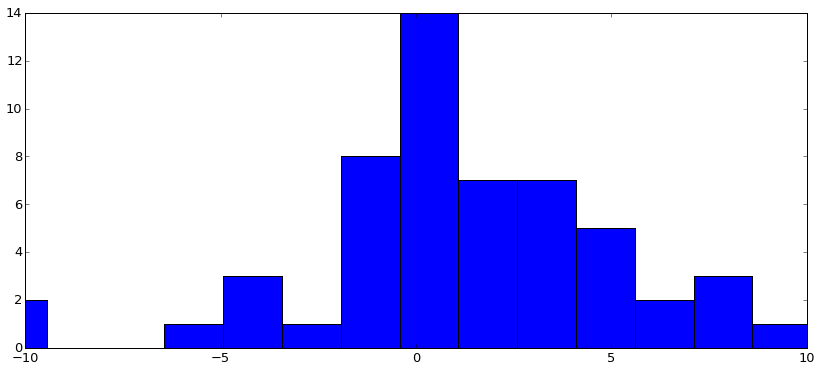

In [362]:
#print distribution of deviations
plt.hist(devs,bins=200)
plt.xlim([-10,10])

### Sample Linear Fitting with Linear Regression Module
<strong> No need to add an extra dummy feature within the linear regression module, but if necessary for other models, use sklearn.preprocessing.add_dummy_feature(X, value=1.0) </strong>

##this portion should stay at end of notebook as scratch area

In [111]:
clf = linear_model.LinearRegression()

In [126]:
X = np.array(df1.population.astype('float'))
X = X[:,np.newaxis]
y = np.array(df1.restaurant_number.astype('float'))
y = y[:,np.newaxis]
clf.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [128]:
y_pred = clf.predict(X)

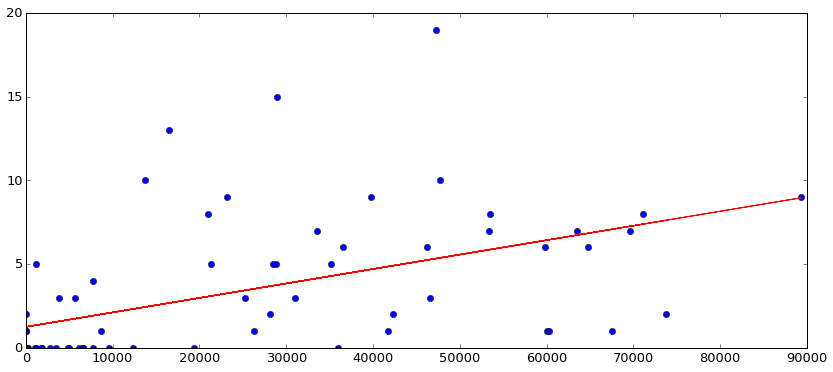

In [132]:
plt.plot(X,y,marker='o',ls="None")
plt.plot(X,y_pred,ls='-',color='red')